In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
telecom = pd.read_csv('E:/May 22 Logistic regression-confusion metrics/Telco-Customer-Churn.csv')

In [126]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [127]:
telecom.drop('customerID', axis = 1, inplace = True)

In [128]:
X=telecom.iloc[:, [1, 19]].values
y = telecom.iloc[:, -1].values

In [129]:
telecom.shape

(7043, 20)

In [130]:
#telecom.dtypes

In [131]:
#telecom.isnull().sum()

In [132]:
telecom['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [133]:
telecom['gender'] = telecom.gender.replace({'Male': 1, 'Female': 2})

In [134]:
#telecom['SeniorCitizen'].value_counts()

In [135]:
telecom['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [136]:
telecom['Partner'] = telecom.Partner.replace({'No':1, 'Yes':0})

In [137]:
telecom['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [138]:
telecom['Dependents'] = telecom.Dependents.replace({'No':1, 'Yes':0})

In [139]:
telecom['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [140]:
telecom['PhoneService'] = telecom.PhoneService.replace({'Yes':1, 'No':0})

In [141]:
telecom['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [142]:
telecom['MultipleLines'] = telecom.MultipleLines.replace({'No':1, 'Yes':2, 'No phone service':0})

In [143]:
telecom['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [144]:
telecom['InternetService'] = telecom.InternetService.replace({'Fiber optic': 1, 'DSL': 2, 'No':0})

In [145]:
telecom['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [146]:
telecom['OnlineSecurity'] = telecom.OnlineSecurity.replace({'No':1, 'Yes':2, 'No internet service': 0})

In [147]:
telecom['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [148]:
telecom['DeviceProtection'] = telecom.DeviceProtection.replace({'No': 1, 'Yes':2, 'No internet service':0})

In [149]:
telecom['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [150]:
telecom['TechSupport'] = telecom.TechSupport.replace({'No':1, 'Yes':2, 'No internet serice': 0})

In [151]:
telecom['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [152]:
telecom['StreamingTV'] = telecom.StreamingTV.replace({'No':1, 'Yes':2, 'No internet service':0})

In [153]:
telecom['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [154]:
telecom['StreamingMovies'] = telecom.StreamingMovies.replace({'No':1, 'No': 2, 'No internet service':0})

In [155]:
telecom['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [156]:
telecom['Contract'] = telecom.Contract.replace({'Month-to-month':1, 'Two year':2, 'One year':0})

In [157]:
telecom['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [158]:
telecom['PaperlessBilling'] = telecom.replace({'Yes':1, 'No':0})

In [159]:
telecom['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [160]:
telecom['PaymentMethod'] = telecom.PaymentMethod.replace({'Electronic check':1, 'Mailed check':2, 'Bank transfer (automatic)':3, 
                                                         'Credit card (automatic)': 0})

In [161]:
telecom['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [162]:
telecom['Churn'] = telecom.Churn.replace({'No':1, 'Yes':0})

In [163]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,0,0,1,1,0,0,2,1,Yes,1,1,1,2,1,2,1,29.85,29.85,1
1,1,0,1,1,34,1,1,2,2,No,2,1,1,2,0,1,2,56.95,1889.5,1
2,1,0,1,1,2,1,1,2,2,Yes,1,1,1,2,1,1,2,53.85,108.15,0
3,1,0,1,1,45,0,0,2,2,No,2,2,1,2,0,1,3,42.30,1840.75,1
4,2,0,1,1,2,1,1,1,1,No,1,1,1,2,1,2,1,70.70,151.65,0


In [164]:
telecom.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [165]:
telecom.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup         object
DeviceProtection      int64
TechSupport          object
StreamingTV           int64
StreamingMovies      object
Contract              int64
PaperlessBilling     object
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

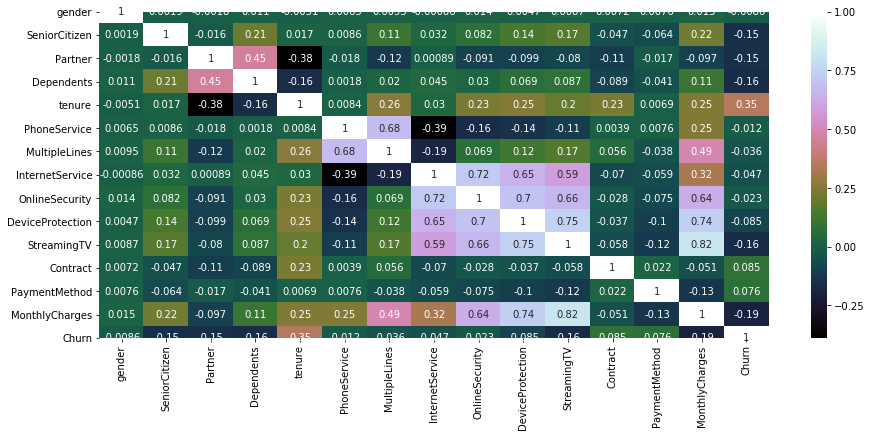

In [166]:
corrmat = telecom.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,6))
sns.heatmap(telecom.corr(),cmap = 'cubehelix', annot=True)

In [167]:
#X = telecom.iloc[:, []]

In [168]:
X = telecom.iloc[:, [8, 17]].values
Y = telecom.iloc[:, -1].values

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [170]:
X_train

array([[ 1.  , 25.3 ],
       [ 1.  , 75.15],
       [ 0.  , 20.05],
       ...,
       [ 0.  , 21.15],
       [ 1.  , 99.45],
       [ 0.  , 19.8 ]])

In [171]:
Y_train

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [172]:
Y_test

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [173]:
from sklearn.decomposition import PCA

In [174]:
pca = PCA(n_components = 2)

In [175]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [176]:
explained_variance = pca.explained_variance_ratio_

In [177]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
telecom = lr.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [178]:
x_pred = telecom.predict(X_train)
y_pred = telecom.predict(X_test)

In [179]:
x_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [180]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [182]:
print('Training Accuracy score', accuracy_score(x_pred, y_train))
print('Testing Accuracy score', accuracy_score(y_pred, y_test))

Training Accuracy score 0.7357061719045817
Testing Accuracy score 0.7251561612720046


In [112]:
cm = confusion_matrix(y_test, predy)

In [113]:
cm

array([[   0,  479],
       [   4, 1278]], dtype=int64)